# Week 7 Lecture Slides Code on Optimisation Methods: Least Squares

[ 2.18325527 -3.78458374] [0.26538942 1.59248873]


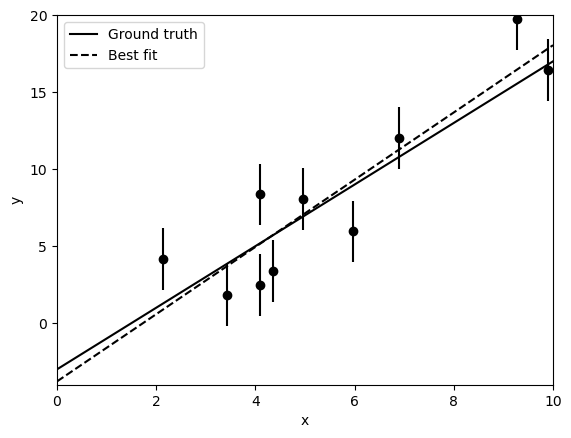

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

# Define some noisy data
err = 2
x = np.random.uniform(0.,10,10)
y = 2*x - 3
y += np.random.normal(0,err,len(x))
errs = np.array([err]*len(x))

# Plot the points
plt.plot(x,y,marker="o", linestyle="none", markerfacecolor="black", markeredgecolor="black")

# And error bars
plt.errorbar(x,y,yerr=err, linestyle="none", color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.axis((0,10,-4,20))

# Define our model with two parameters
def model(x,m,c):
    return m*x + c

# Use the optimize curve_fit() function to fit. We also supply the estimate
# of the uncertainty on each point. Our first guess of the parameters is m=0, c=0
popt,pcov = optimize.curve_fit(model, x, y, sigma=errs, absolute_sigma=True, p0=(0,0))

# Plot the ground truth input and the best fit
xs = np.linspace(0,10,10)
plt.plot(xs,model(xs,2,-3), linestyle="solid", label="Ground truth",color="black")
plt.plot(xs,model(xs,*popt), linestyle="dashed", label="Best fit", color="black")
plt.legend()

# Print the best fit parameters and their uncertainties
print(popt, np.diag(pcov)**0.5)
